## Apresentação

**Wagner Ribeiro De Carvalho
11 976098988**

No Kaggle: Existe uma competição que é lendária o Titanic, a competição é simples use o aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.

tentaremos criar um código que verifica se o passageiro sobreviveu de acordo com o status econômico (classe), sexo, idade e sobrevivência. Neste desafio, somos solicitados a prever se um passageiro do Titanic teria sobrevivido ou não.

Aqui temos alguns scripts de analise de dados e machine learning sobre quem poderia sobreviver no acidente do titanic esse script esta na versão em teste e alguns não rodara da forma correta.

## **Preparando os Dados**

In [75]:
pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=a1423d561d07a4559df223f13240511e32bc23b789475004465cdc2ba5d1429e
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [1]:
#Carrendo as Bibliotecas
import numpy as np 
import pandas as pd 
import seaborn as sns
import re

In [76]:
# Algoritimos de Machine Learning e gráfico
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

from sklearn_pandas import DataFrameMapper, gen_features;

from sklearn.compose import make_column_selector;
from sklearn.base import BaseEstimator, TransformerMixin;
from sklearn.pipeline import make_pipeline, Pipeline ;
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler, RobustScaler, OrdinalEncoder;
from sklearn.impute import SimpleImputer;

from sklearn.model_selection import KFold, GridSearchCV;
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier;
from xgboost import XGBClassifier;
from lightgbm import LGBMClassifier;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.linear_model import LogisticRegression;

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix;

import regex as re;

import seaborn as sns;
sns.set_style('darkgrid');

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from warnings import filterwarnings;
from termcolor import colored;

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

%matplotlib inline


**Importando os Dados**

In [3]:
#Importando os Dados

#teste
dfTeste = pd.read_csv("https://raw.githubusercontent.com/wagnerrc9999/Big-Data/main/test.csv")
#treino
dfTreino = pd.read_csv("https://raw.githubusercontent.com/wagnerrc9999/Big-Data/main/train.csv")

**Renomenado as Colunas**

In [4]:
dfTeste.rename(columns = {'PassengerId':'ID_Passageiro', 'Survived':'Sobreviventes',
                     'Pclass':'Classe', 'Name':'Nome',
                     'Sex':'Sexo', 'Age':'Idade',
                     'SibSp':'SibSp', 'Parch':'Parch',
                     'Ticket':'Ticket', 'Fare':'Tarifa',
                     'Cabin':'Cabine', 'Embarked':'Embarcou'
                        }, inplace = True)

In [5]:
#Renomeando as Colunas

dfTreino.rename(columns = {'PassengerId':'ID_Passageiro', 'Survived':'Sobreviventes',
                     'Pclass':'Classe', 'Name':'Nome',
                     'Sex':'Sexo', 'Age':'Idade',
                     'SibSp':'SibSp', 'Parch':'Parch',
                     'Ticket':'Ticket', 'Fare':'Tarifa',
                     'Cabin':'Cabine', 'Embarked':'Embarcou'
                        }, inplace = True)

**Esquemas dos dados e Consultado os Dados **

In [6]:
#Informações 
dfTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Passageiro  891 non-null    int64  
 1   Sobreviventes  891 non-null    int64  
 2   Classe         891 non-null    int64  
 3   Nome           891 non-null    object 
 4   Sexo           891 non-null    object 
 5   Idade          714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Tarifa         891 non-null    float64
 10  Cabine         204 non-null    object 
 11  Embarcou       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


no dados de Treinamento desse Dataset contém 891 exemplos e 11 características + a variável de destino (Survived) . 2 dos recursos são floats, 5 são inteiros e 5 são objetos.

## **Estatista**

Estatistica Descritiva Dos Dados

In [7]:
#
dfTreino.describe()

,ID_Passageiro,Sobreviventes,Classe,Idade,SibSp,Parch,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dfTreino.head(10)

,ID_Passageiro,Sobreviventes,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
dfTotal = dfTreino.isnull().sum().sort_values(ascending=False)
percentual1 = dfTreino.isnull().sum()/dfTreino.isnull().count()*100
percentual2 = (round(percentual1, 1)).sort_values(ascending=False)
missing_data = pd.concat([dfTotal, percentual2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabine,687,77.1
Idade,177,19.9
Embarcou,2,0.2
ID_Passageiro,0,0.0
Sobreviventes,0,0.0


## **Correlação de Sobrevivencia**

In [10]:
dfTreino.columns.values

array(['ID_Passageiro', 'Sobreviventes', 'Classe', 'Nome', 'Sexo',
       'Idade', 'SibSp', 'Parch', 'Ticket', 'Tarifa', 'Cabine',
       'Embarcou'], dtype=object)

Vamos Correlacionar algumas posiveis variaveis de sobrevivencias, nesse caso algumas dessas variaveis seram descartadas, pois para essa analise não seram muito utilizadas.

### **Correlação Entre Homens e Mulheres**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


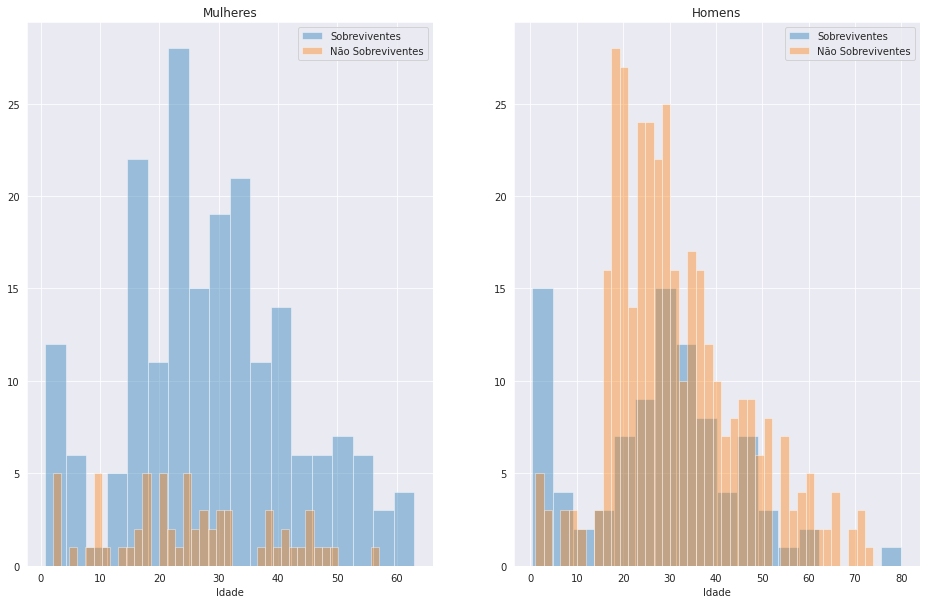

In [11]:
# Idade e Sexo dos Passageiros
Sobreviventes = 'Sobreviventes'
NaoSobreviventes = 'Não Sobreviventes'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 10))


#Mulheres
Mulheres = dfTreino[dfTreino['Sexo']=='female']
ax = sns.distplot(Mulheres[Mulheres['Sobreviventes']==1].Idade.dropna(), bins=18, label = Sobreviventes, ax = axes[0], kde =False)
ax = sns.distplot(Mulheres[Mulheres['Sobreviventes']==0].Idade.dropna(), bins=40, label = NaoSobreviventes, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Mulheres')

#Homens
Homens = dfTreino[dfTreino['Sexo']=='male'] 
ax2 = sns.distplot(Homens[Homens['Sobreviventes']==1].Idade.dropna(), bins=18, label = Sobreviventes, ax = axes[1], kde = False)
ax2 = sns.distplot(Homens[Homens['Sobreviventes']==0].Idade.dropna(), bins=40, label = NaoSobreviventes, ax = axes[1], kde = False)
ax2.legend()
_ = ax2.set_title('Homens')

Os Embarques estão mais correlacionada com a sobrevivência, dependendo do sexo. no caso mulheres com pora Q e S têm maior chance de sobrevivência,
Ja para os Homens a sua maior chance estava na porta C, e menor nas portas Q



**Embarcação, Classes de bilhetes e Sexo:**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


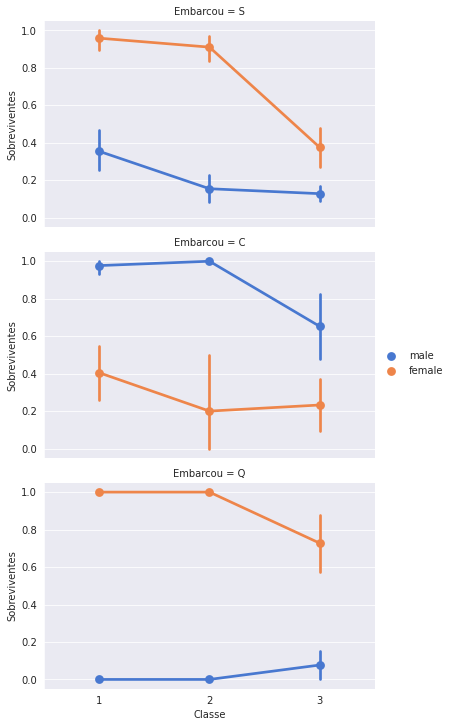

In [12]:
# Embarcação, Classes de bilhetes e Sexo:
FacetGrid = sns.FacetGrid(dfTreino, row='Embarcou', size=3.4, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Classe', 'Sobreviventes', 'Sexo', palette="muted",  order=None, hue_order=None )
FacetGrid.add_legend()

#AZul = Home
#Laranja = Mulher

### **Gráfico**

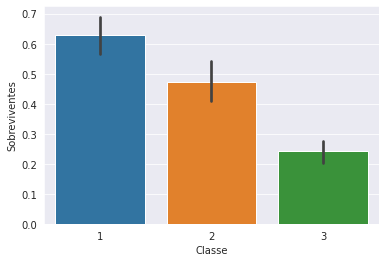

In [13]:
#Passageiros por Classe
sns.barplot(x='Classe', y='Sobreviventes', data=dfTreino)

**Diferença Entre Sobreviventes dos Sexo**

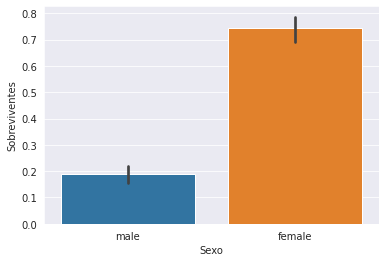

In [14]:
#Passageiros Sobreviventes por Sexo.
sns.barplot(x='Sexo', y='Sobreviventes', data=dfTreino)

Passageiros Sobreviventes por Idade

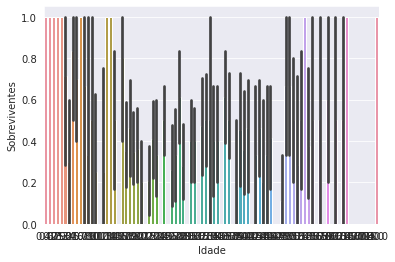

In [15]:
sns.barplot(x='Idade', y='Sobreviventes', data=dfTreino)

### **Rede**

Agora Vamos Criar um outro Tipo de Gráfico Plotagem para as Informações que estamos Analisando dos sobreviventes.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


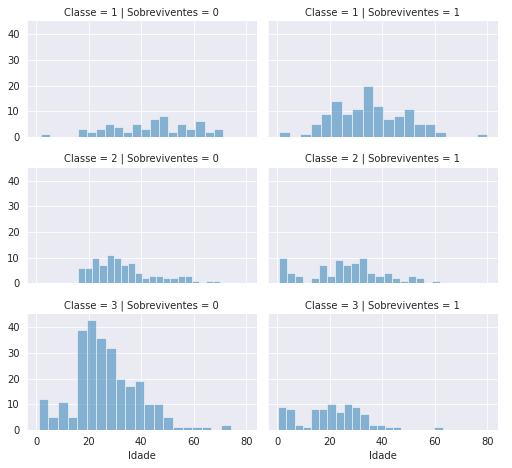

In [16]:
Rede = sns.FacetGrid(dfTreino, col='Sobreviventes', row='Classe', size=2.2, aspect=1.6)
Rede.map(plt.hist, 'Idade', alpha=.5, bins=20)
Rede.add_legend();

**SibSp and Parch:**
SibSp e Parch faria mais sentido como uma característica combinada, que mostra o número total de parentes, uma pessoa tem no Titanic. Vou criá-lo abaixo e também um recurso que semeia se alguém não está sozinho.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


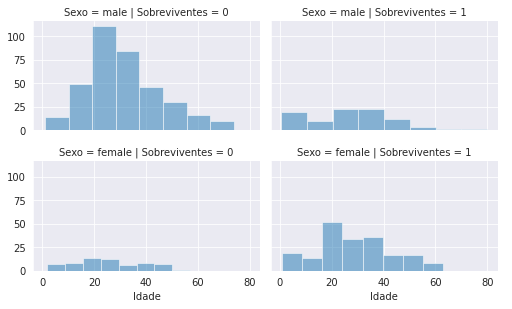

In [17]:
# por Sexo e Idade
Rede_1 = sns.FacetGrid(dfTreino, col='Sobreviventes', row='Sexo', size=2.2, aspect=1.6)
Rede_1.map(plt.hist, 'Idade', alpha=.5, bins=8)
Rede_1.add_legend();

### Criando um gráfico onde mostra uma caracteristica combinada do numero total de parentes, e verificar se ele não esta sozinho.


In [18]:
Data = [dfTreino, dfTeste]
for Dataset in Data:
    Dataset['Relativo'] = Dataset['SibSp'] + Dataset['Parch']
    Dataset.loc[Dataset['Relativo'] > 0, 'Acompanhado'] = 0
    Dataset.loc[Dataset['Relativo'] == 0, 'Acompanhado'] = 1
    Dataset['Acompanhado'] = Dataset['Acompanhado'].astype(int)

In [19]:
dfTreino['Acompanhado'].value_counts()

1    537
0    354
Name: Acompanhado, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


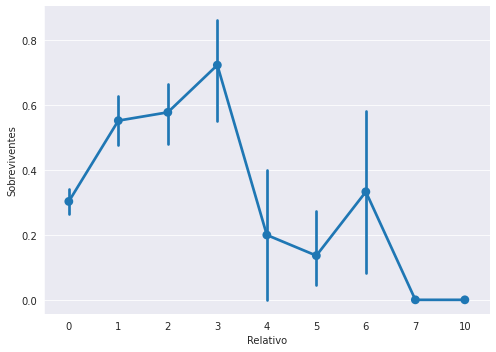

In [20]:
axes = sns.factorplot('Relativo','Sobreviventes', 
                      data=dfTreino, aspect = 1.4, )

## **Pré-Processamento de Dados**

## **Tratando os Dados**

**Tarifas**

**Comvertendo Tarifa Float para Int64 com o Pandas**

In [21]:
Data = [dfTreino, dfTreino]

for Dataset in Data:
    Dataset['Tarifa'] = Dataset['Tarifa'].fillna(0)
    Dataset['Tarifa'] = Dataset['Tarifa'].astype(int)

Dados Ausentes:


### **Cabine**

In [22]:
Categoria = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

In [23]:
#Cabine

Data = [dfTreino, dfTeste]

for Dataset in Data:
    Dataset['Cabine'] = Dataset['Cabine'].fillna("U0")
    # função Lambda
    Dataset['Categoria'] = Dataset['Cabine'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    Dataset['Categoria'] = Dataset['Categoria'].map(Categoria)
    Dataset['Categoria'] = Dataset['Categoria'].fillna(0)
    Dataset['Categoria'] = Dataset['Categoria'].astype(int)

### **Idade**

In [24]:
#Idade

Data = [dfTreino, dfTeste]

for Dataset in Data:
    Media = dfTreino["Idade"].mean()
    Desvio_Padrao = dfTeste["Idade"].std()
    is_null = Dataset["Idade"].isnull().sum()

In [25]:
# Gerando dados Aleatorios na idade
Idade_Aleatoria = np.random.randint(Media - Desvio_Padrao, Media + Desvio_Padrao, size = is_null)

In [26]:
    # Gerando valores Aleatórios nos campos NaN
    Fatiar_Idade = Dataset["Idade"].copy()
    Fatiar_Idade[np.isnan(Fatiar_Idade)] = Idade_Aleatoria
    Dataset["Idade"] = Fatiar_Idade

In [27]:
 #   Dataset["Idade"] = dfTreino["Idade"].astype(int)

In [28]:
dfTreino["Idade"].isnull().sum()

177

### **Embarques**

In [29]:
dfTreino['Embarcou'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarcou, dtype: object

In [30]:
common_value = 'S'
Data = [dfTreino, dfTeste]

for Dataset in Data:
    Dataset['Embarcou'] = Dataset['Embarcou'].fillna(common_value)

#### **Convertendo** **Embarcou** **em** **numerico**


In [31]:
Porta = {"S": 0, "C": 1, "Q": 2}
Data = [dfTreino, dfTeste]

for Dataset in Data:
    Dataset['Embarcou'] = Dataset['Embarcou'].map(Porta)

In [32]:
dfTreino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Passageiro  891 non-null    int64  
 1   Sobreviventes  891 non-null    int64  
 2   Classe         891 non-null    int64  
 3   Nome           891 non-null    object 
 4   Sexo           891 non-null    object 
 5   Idade          714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Tarifa         891 non-null    int64  
 10  Cabine         891 non-null    object 
 11  Embarcou       891 non-null    int64  
 12  Relativo       891 non-null    int64  
 13  Acompanhado    891 non-null    int64  
 14  Categoria      891 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 104.5+ KB


### **SEXO**

Convertendo 'Sexo' em numérico.

In [33]:
Genero = {"male": 0, "female": 1}
Data = [dfTreino, dfTeste]

for Dataset in Data:
    Dataset['Sexo'] = Dataset['Sexo'].map(Genero)

### **Nomes e Titulos**

Usaremos o recurso Name para extrair os Títulos do Nome, para que possamos criar um novo recurso a partir disso.

In [34]:
Data = [dfTreino, dfTeste]
Titulo = {"Senhor": 1, "Senhora": 2, "Senhores": 3, "Mestre": 4, "Dona": 5}

for Dataset in Data:
    # extraindo os titulos
    Dataset['Titulo'] = Dataset.Nome.str.extract(' ([A-Za-z]+)\.', expand=False)

    # Renomenado os titulos das pessoas
    Dataset['Titulo'] = Dataset['Titulo'].replace(['Senhora', 'Condessa','Capitão', 'Col','Don', 'Doutor',\
                                            'Superior', 'Rev', 'Senhor', 'Jonkheer', 'Dona'], 'Rare')
    Dataset['Titulo'] = Dataset['Titulo'].replace('Mlle', 'Senhora')
    Dataset['Titulo'] = Dataset['Titulo'].replace('Ms', 'Senhora')
    Dataset['Titulo'] = Dataset['Titulo'].replace('Mme', 'senhor')

    # converter títulos em números
    Dataset['Titulo'] = Dataset['Titulo'].map(Titulo)
    # Inserindo o 0 nos campos NaN 
    Dataset['Titulo'] = Dataset['Titulo'].fillna(0)

### **Ticket**

OPCIONAL

In [35]:
#Removendo os Tickets Opcional
#dfTreino = dfTreino.drop(['Ticket'], axis=1)
#dfTeste = dfTeste.drop(['Ticket'], axis=1)

#Descrição
dfTreino['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

## **Criando as Categorias**

### **iDADE**

In [36]:
Data = [dfTreino, dfTeste]

for Dataset in Data:
   # Dataset['Idade'] = Dataset['Idade'].astype(int)
    Dataset.loc[ Dataset['Idade'] <= 11, 'Idade'] = 0

    # aqui é entre uma idade e outra no caso se a idade está entre 11 e 18 = 1
    # e por ai vai.
    Dataset.loc[(Dataset['Idade'] > 11) & (Dataset['Idade'] <= 18), 'Idade'] = 1
    Dataset.loc[(Dataset['Idade'] > 18) & (Dataset['Idade'] <= 22), 'Idade'] = 2
    Dataset.loc[(Dataset['Idade'] > 22) & (Dataset['Idade'] <= 27), 'Idade'] = 3
    Dataset.loc[(Dataset['Idade'] > 27) & (Dataset['Idade'] <= 33), 'Idade'] = 4
    Dataset.loc[(Dataset['Idade'] > 33) & (Dataset['Idade'] <= 40), 'Idade'] = 5
    Dataset.loc[(Dataset['Idade'] > 40) & (Dataset['Idade'] <= 66), 'Idade'] = 6
    Dataset.loc[ Dataset['Idade'] > 66, 'Idade'] = 7

In [37]:
# Verificando a distribuição
dfTreino['Idade'].value_counts()

6.0    143
4.0    126
3.0    106
5.0    101
2.0     92
1.0     71
0.0     68
7.0      7
Name: Idade, dtype: int64

### **Tarifa**

In [38]:
Data = [dfTreino, dfTeste]

for Dataset in Data:
    Dataset.loc[ Dataset['Tarifa'] <= 7.91, 'Tarifa'] = 0
    Dataset.loc[(Dataset['Tarifa'] > 7.91) & (Dataset['Tarifa'] <= 14.454), 'Tarifa'] = 1
    Dataset.loc[(Dataset['Tarifa'] > 14.454) & (Dataset['Tarifa'] <= 31), 'Tarifa']   = 2
    Dataset.loc[(Dataset['Tarifa'] > 31) & (Dataset['Tarifa'] <= 99), 'Tarifa']   = 3
    Dataset.loc[(Dataset['Tarifa'] > 99) & (Dataset['Tarifa'] <= 250), 'Tarifa']   = 4
    Dataset.loc[ Dataset['Tarifa'] > 250, 'Tarifa'] = 5

In [39]:
    Dataset['Tarifa'] = dfTreino['Tarifa'].astype(int)

## **Criando novos parametros**

In [51]:
dfTreino.head(50)


,ID_Passageiro,Sobreviventes,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou,Relativo,Acompanhado,Categoria,Titulo,Idade_Classe,Tarifa_Por_Pessoa
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0,U0,0,1,0,8,0.0,6.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,3,C85,1,1,0,3,0.0,5.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,0,U0,0,0,1,8,0.0,9.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,3,C123,0,1,0,3,0.0,5.0,1
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,1,U0,0,0,1,8,0.0,15.0,1
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,1,U0,2,0,1,8,0.0,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,6.0,0,0,17463,3,E46,0,0,1,5,0.0,6.0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,2,U0,0,4,0,8,0.0,0.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3.0,0,2,347742,1,U0,0,2,0,8,0.0,9.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2,U0,1,1,0,8,0.0,2.0,1


In [52]:
Data = [dfTreino, dfTeste]
for Dataset in Data:
    Dataset['Idade_Classe']= Dataset['Idade']* Dataset['Classe']

In [53]:
for Dataset in Data:
    Dataset['Tarifa_Por_Pessoa'] = Dataset['Tarifa']/(Dataset['Relativo']+1)
    Dataset['Tarifa_Por_Pessoa'] = Dataset['Tarifa_Por_Pessoa'].astype(int)

## **Analise dos Dados**

### **Desastre**

**Dividindo os dados de treinamento em recursos e destino**

In [54]:

# Criando dois Dataframes um apenas com os sobrevivnetes e e outro apagando os sobreviventes do dataset semelhante a tentativa la em cima.
x_dfTreino, y_dfTreino = dfTreino.drop('Sobreviventes', axis= 1), dfTreino[['Sobreviventes']];

print(colored(F"Train-Test dataframe lengths = {len(dfTreino), len(dfTeste)}", color= 'red', attrs= ['bold']));

print(colored(F"\nInformações do Conjunto de Dados\n", color = 'green', attrs= ['bold', 'dark']));
display(dfTreino.info());
print(colored(F"\nTrain-set description\n", color = 'green', attrs= ['bold', 'dark']));
display(dfTreino.describe().style.format('{:.2f}'));

Train-Test dataframe lengths = (891, 418)

Informações do Conjunto de Dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Passageiro      891 non-null    int64  
 1   Sobreviventes      891 non-null    int64  
 2   Classe             891 non-null    int64  
 3   Nome               891 non-null    object 
 4   Sexo               891 non-null    int64  
 5   Idade              714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Tarifa             891 non-null    int64  
 10  Cabine             891 non-null    object 
 11  Embarcou           891 non-null    int64  
 12  Relativo           891 non-null    int64  
 13  Acompanhado        891 non-null    int64  
 14  Categoria          891 non-null    int64  
 1

None


Train-set description



,ID_Passageiro,Sobreviventes,Classe,Sexo,Idade,SibSp,Parch,Tarifa,Embarcou,Relativo,Acompanhado,Categoria,Titulo,Idade_Classe,Tarifa_Por_Pessoa
count,891.00,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,714.00,891.00
mean,446.00,0.38,2.31,0.35,3.49,0.52,0.38,1.52,0.36,0.90,0.60,6.94,0.01,7.22,0.80
std,257.35,0.49,0.84,0.48,1.96,1.10,0.81,1.25,0.64,1.61,0.49,2.07,0.12,4.77,0.95
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,0.00,4.00,0.00
50%,446.00,0.00,3.00,0.00,4.00,0.00,0.00,1.00,0.00,0.00,1.00,8.00,0.00,6.00,1.00
75%,668.50,1.00,3.00,1.00,5.00,1.00,0.00,2.00,1.00,1.00,1.00,8.00,0.00,10.00,1.00
max,891.00,1.00,3.00,1.00,7.00,8.00,6.00,5.00,2.00,10.00,1.00,8.00,2.00,21.00,5.00


**Coluna de Destino**

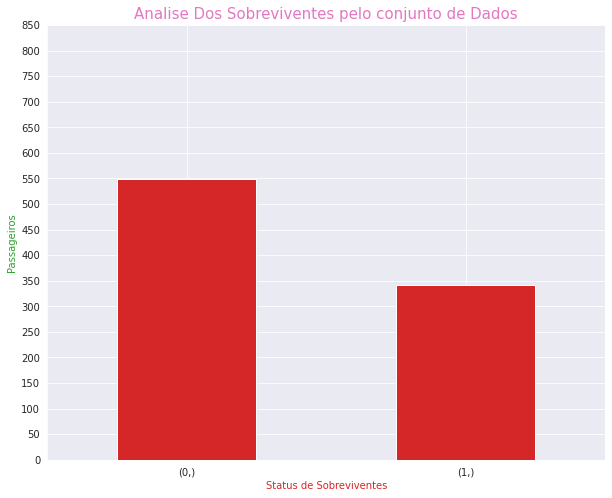

In [55]:
#Selecionando o Tamanho da Figura.
plt.subplots(1,1,figsize= (10,8));

#Atribuindo os valores

#Selecionando a cor do Gráfico. no caso vermelho
ax3 = y_dfTreino.value_counts().plot.bar(color= 'tab:red');

#Selecionando a Cor do Título do Grafico no caso aqui Rosa. e o tamanho e a Fonte
ax3.set_title("Analise Dos Sobreviventes pelo conjunto de Dados", color = 'tab:Pink', fontsize= 15);

#Sekecionando a Texto e a Cor de Rodapé do Gráfico
ax3.set_xlabel('Status de Sobreviventes', color= 'tab:red');


ax3.set_yticks(range(0, len(x_dfTreino), 50));
ax3.set_ylabel('Passageiros', color= 'tab:green');
plt.xticks(rotation = 0);
plt.show();

### **Classe e sexo do passageiro**

In [56]:
#Agrupando os dados de Classe e sexo.
p1 = dfTreino.groupby(['Sexo', 'Classe']).agg(Sobreviventes = pd.NamedAgg('Sobreviventes', np.sum),Passageiros = pd.NamedAgg('Sobreviventes', np.size)).sort_index(level=[1,0])
p1['Sobreviventes_Rate'] = p1['Sobreviventes'] 


#/ p1['Passengers'];
print(colored(f'\nPassageiros sobrevivêntes pela Classe e Sexo.\n', color = 'green', attrs= ['bold', 'dark'])); \
display(p1.style.format({'Sobreviventes_Rate':'{:.2%}'}))


Passageiros sobrevivêntes pela Classe e Sexo.



,,Sobreviventes,Passageiros,Sobreviventes_Rate
Sexo,Classe,,,
0,1,45,122,4500.00%
1,1,91,94,9100.00%
0,2,17,108,1700.00%
1,2,70,76,7000.00%
0,3,47,347,4700.00%
1,3,72,144,7200.00%


In [57]:
p10 = p1.groupby(level= 0).agg({'Sobreviventes':np.sum, 'Passageiros':np.sum});
p10['Survival_Rate'] = p10['Sobreviventes'] / p10['Passageiros'];

p11 = p1.groupby(level= 1).agg({'Sobreviventes':np.sum, 'Passageiros':np.sum});
p11['Survival_Rate'] = p11['Sobreviventes'] / p11['Passageiros'];

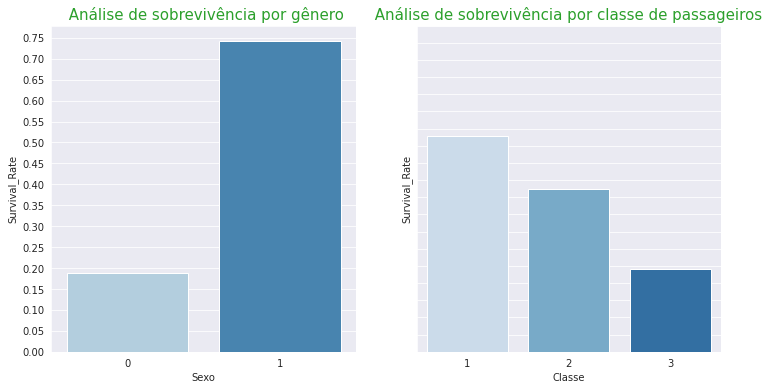

In [58]:
print('\n');
fig, ax = plt.subplots(nrows= 1,ncols=2,figsize = (12,6), sharey= True);

#Mulheres são representadas pelo 0 (p10) e os homens pelo 1 (p11)
sns.barplot(x = p10.index, y = p10.Survival_Rate, palette = 'Blues', ax = ax[0]);
sns.barplot(x = p11.index, y = p11.Survival_Rate, palette = 'Blues', ax= ax[1]);

# Gerando os Gráficos
ax[0].set_title(" Análise de sobrevivência por gênero", color = 'tab:green', fontsize = 15);
ax[1].set_title(" Análise de sobrevivência por classe de passageiros ", color = 'tab:green', fontsize = 15);

plt.yticks(np.arange(0,1,0.05),fontsize= 12, color = 'red');
plt.show()

del p1, p10, p11;

### **Idade**

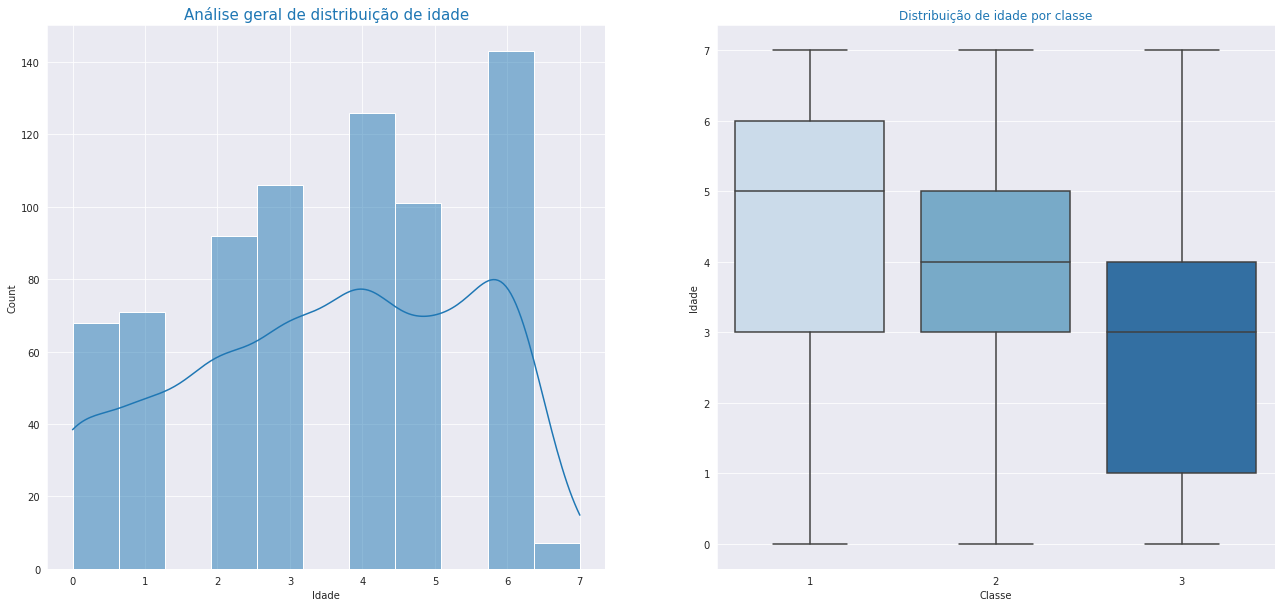

In [59]:
fig, ax = plt.subplots(1,2,figsize = (22,10));
sns.histplot(x = dfTreino['Idade'], kde= True, palette = 'Blues', ax = ax[0]);
ax[0].set_title(f"Análise geral de distribuição de idade", color = 'tab:blue', fontsize= 15 )

sns.boxplot(x = dfTreino.Classe, y = dfTreino.Idade, palette = 'Blues', ax = ax[1]);
ax[1].set_title(f"Distribuição de idade por classe", color = 'tab:blue', fontsize= 12);

plt.show();

### **Sobreviventes Pela Tarifa**

In [60]:
#Selecionando o Texto o Tamanho e as Cores
print(colored(f"\nTarifa do bilhete por Classe e sobrevivência\n", color = 'green', attrs= ['bold', 'dark']));

# Mostrando os Dados e os sobreviventes pela Tarifa
display(dfTreino.groupby(['Classe', 'Sobreviventes']).agg({'Tarifa': [np.amin, np.median, np.mean, np.amax]}).style.format('{:.2f}'))


Tarifa do bilhete por Classe e sobrevivência



### Inferencia dos Dados

In [61]:
print(colored(f"\nInferência de dados nulos na Coluna de Cabine\n", color = 'green', attrs= ['bold', 'dark']));


display(dfTreino.assign(Cabine = dfTreino.Cabine.str[0:1]).groupby(['Cabine', 'Classe'], dropna= False).\
        agg({'Tarifa':[np.median, np.mean, np.amin, np.amax], 
             'ID_Passageiro':[np.size], 
             'Sobreviventes': [np.sum]})\
        .style.format('{:,.0f}'));


Inferência de dados nulos na Coluna de Cabine



### **Criando funções e classes de ajudante de pipeline**

Esta é uma função adicional para tratar a coluna de cabine com valor nulo nos dados de treino e de teste.
    Isso foi projetado para imputar os nulos em vez de descartar a coluna completamente.

    O tratamento de nulos segue o processo abaixo:

    1. Crie uma variável composta com a categoria cabina (1ª letra na coluna cabine) e a Classe.
    Esta é uma variável de interação

    2. Considere passageiros com a mesma Classe do sujeito

    3. Mapeie a categoria de cabine composta com as instâncias nulas na cabine com base na diferença de tarifa mais baixa.
    As funções SQL de janela são usadas para o mesmo

    4. Para os casos em que a tarifa não esteja disponível, utilize a modalidade da categoria de cabine por Classe.
    
    Input- df1 (dataframe):- Dataframe de entrada sem tratamento
    Retorna- df (dataframe):- Dataframe com os nulos da cabine tratados

In [63]:
def TreatCabinNulls(df1:pd.DataFrame):
    """    
    """;
    
    global dfTreino, dfTeste;
    
    cabine_trmt_prf = \
    sqldf(f""" 
    select ID_Passageiro, Classe, Tarifa, Embarcou, Cabine from dfTreino 
    union all
    select ID_Passageiro, Classe, Tarifa, Embarcou, Cabine from dfTeste
    """);

    #  Criando uma variável proxy com a tarifa e Classe   
    cabine_trmt_prf = \
    sqldf(f"""
   select A1.PID1 as ID_Passageiro, A1.Classe, A1.cabine_Ctg_Lbl
    from 
    (
    select a.ID_Passageiro as PID1,a.Classe, b.ID_Passageiro as PID2, b.cabine_Ctg_Lbl, a.Tarifa as Tarifa, b.Tarifa as Tarifa, abs(a.Tarifa - b.Tarifa) as Tarifa_Diff,
    row_number() over(partition by a.ID_Passageiro ORDER BY abs(a.Tarifa - b.Tarifa) asc) as Tarifa_Diff_Rank
    from 
    (select ID_Passageiro, Classe, Tarifa, Embarcou from cabine_trmt_prf WHERE Cabine is null) A 
    inner join 
    (
    select ID_Passageiro, Classe, Tarifa, (cast(Classe as varchar(1)) || substr(Cabine,1,1)) AS cabine_Ctg_Lbl, Embarcou 
    from cabine_trmt_prf 
    where Cabine is not null
    ) B on (A.Classe = B.Classe and abs(a.Tarifa - b.Tarifa) <= 50)
    ) A1
    where A1.Tarifa_Diff_Rank == 1
    """);
    
    #  Finalmente anexando os nulos ainda presentes com o modo do rótulo Classe e Categorias:-
    cabine_trmt_prf = \
    sqldf("""
    select a.* from 
    (
    select Classe, cabine_Ctg_Lbl, count(ID_Passageiro) as cnt, row_number() over (order by count(ID_Passageiro) desc) as rank_id
    from cabine_trmt_mst 
    group by Classe, cabine_Ctg_Lbl
    ) a
    where a.rank_id = 1
    """);
 
    # Mapeando a variável de interação para a tabela relevante:-   
    df = df1.copy();   
    df = sqldf("""
    select a.*, coalesce(coalesce(b.cabine_Ctg_Lbl, cast(a.Classe as varchar(1)) || substr(a.Cabine,1,1)), c.cabine_Ctg_Lbl) as cabine_Class_Lbl 
    from df a 
    left join cabine_trmt_mst b on a.ID_Passageiro = B.ID_Passageiro
    left join cabine_md_sum c on a.Classe = c.Classe
    """);  
    
    del cabine_trmt_mst, cabine_trmt_prf, cabine_md_sum; 
    return df;  

Esta função faz as tarefas abaixo:

    1. Cria um atributo de título da coluna de nome
    2. Atribui 'outros' a títulos incomuns
    3. Cria um sinalizador para 'filho' a partir do título. Isso é    usado para preencher os nulos de idade.
    4. Cria uma coluna 'contagem de membros da família' a partir dos atributos Sibsp e Parch
    5. Descarta colunas supérfluas
    
    Entrada- df (dataframe):- Análise de dataframe
    Retorna- df (dataframe):- Dataframe modificado  

In [68]:
def Xform_Data(df1:pd.DataFrame): 
    """
   
    """;
    
    filterwarnings(action= "ignore");
    df = df1.copy();
    
    df['Titulo'] = df['Nome'].apply(lambda x: re.findall(r"\S+\. ",x)[0].strip()[0:-1]);
    df['Titulo'].loc[~df.Titulo.isin(['Senhor', 'Senhora', 'Miss', 'Mestre'])] = 'Outro';
    df['Crianca'] = np.select([df['Titulo'].str.lower() == 'Mestre2'], ['Sim'], 'Nao');    
    df['Nb_Familia_Mem'] = df['SibSp'].fillna(0) + df['Parch'].fillna(0);  

    #Apagando os dados.
    df = df.drop(['ID_Passageiro', 'Ticket', 'Nome', 'Cabine'], axis= 1);  
    
    return df;

In [69]:
class IdadeImputer(BaseEstimator, TransformerMixin):

    """Esta classe foi projetada para preencher os valores nulos de idade com as medianas baseadas no gênero infantil/adulto""";
    def __init__(self): pass
    def fit(self, X, y=None, **fit_params):

        "Esta função aprende as medianas de treinamento nos grupos de crianças e adultos para preencher nulos";
        self.median_ = X.groupby(['Criancas','Sexo'])[['Idade']].median().reset_index();
        return self;
    def transform(self, X, y=None, **transform_params):
        
        "Esta função imputa os valores nulos no conjunto de dados relevante de acordo com as medianas";
        X1 = X.merge(self.median_, how= 'left', on= ['Criancas', 'Sexo'], suffixes= ('', '_Median'));
        X1['Idade'] = X1['Idade'].fillna(X1.Idade_Median);
        X1 = X1.drop(['Idade_Median'], axis= 1);
        return X1;
       

In [70]:
class TarifaImputer(BaseEstimator, TransformerMixin):

    """Esta classe é projetada para preencher os valores nulos da tarifa do bilhete com as medianas da classe""";
    def __init__(self): pass
    def fit(self, X, y=None, **fit_params):

        "Esta função aprende as medianas de treinamento nos grupos de classes para preencher nulos";
        self.median_ = X.groupby(['Classe'])[['Tarifa']].median().reset_index();
        return self;
    def transform(self, X, y=None, **transform_params):

        "Esta função imputa os valores nulos no conjunto de dados relevante de acordo com as medianas";
        X1 = X.merge(self.median_, how= 'left', on= ['Classe'], suffixes= ('', '_Median'));
        X1['Tarifa'] = X1['Tarifa'].fillna(X1.Tarifa_Median);
        X1 = X1.drop(['Tarifa_Median'], axis= 1);
        return X1;

Esta classe desenvolve bins para a idade e tarifa do bilhete, para promover a estabilidade e oferecer uma previsibilidade melhor e mais estável.
    Os parâmetros do conjunto de treinamento são desenvolvidos com a função de ajuste.

In [71]:
class IdadeTarifaBinner(BaseEstimator, TransformerMixin):
    """. 
    """;
    
    def __init__(self, nb_Idade_bins: int = 5, nb_Tarifa_bins:int = 5): 
        self.nb_Idade_bins = nb_Idade_bins
        self.nb_Tarifa_bins = nb_Tarifa_bins
    
    def fit(self, X, y= None, **fit_params):
        """Esta função calcula os compartimentos para as colunas de idade e tarifa, respectivamente""";     
        self.Idade_bins_ = pd.qcut(X['Idade'], q = self.nb_Idade_bins, retbins= True, labels = range(1,self.nb_Idade_bins + 1,1))[1];
        self.Tarifa_bins_ = pd.qcut(X['Tarifa'], q = self.nb_Tarifa_bins, retbins= True, labels = range(1,self.nb_Tarifa_bins + 1,1))[1];   
        return self;
        
    def transform(self, X, y=None, **transform_param):
        """Esta função aplica os resultados agrupados ao dataframe relevante e retorna a coluna rotulada""";        
        X1 = X.copy();
        
        self.Idade_bins_[0] = 0.0; self.Tarifa_bins_[0] = 0.0;
        self.Idade_bins_[-1] = np.inf; self.Tarifa_bins_[-1] = np.inf;
        
        X1['Idade_Bin'] = pd.cut(X1['Idade'], self.Idade_bins_, retbins= False, labels = range(1,self.nb_Idade_bins + 1,1), include_lowest= True);
        X1['Tarifa_Bin'] = pd.cut(X1['Tarifa'], self.Tarifa_bins_, retbins= False, labels = range(1,self.nb_Idade_bins + 1,1), include_lowest= True); 
               
        global df_col; df_col = list(X1.columns);
        return X1;

In [72]:
nb_Idade_bins = 5;
nb_Tarifa_bins = 5;
enc_col_lst = ['Sexo', 'Embarcou', 'Titulo', 'Crianca'];
std_col_lst = ['Idade', 'Tarifa', 'SibSp', 'Parch', 'Nb_Familia_Mem' ]

Data_Processor = \
Pipeline(verbose=True, 
         steps= \
         [('Imp_Cabine', FunctionTransformer(func= TreatCabinNulls)),
          ('Xform_Data', FunctionTransformer(func= Xform_Data)),
          ('Imp_Embarque', DataFrameMapper(default= None, input_df= True, df_out= True, 
                                             features= [(['Embarcou'], SimpleImputer(strategy= 'mais frequente'))])
          ),
          ('Lbl_Enc', DataFrameMapper(default= None, input_df= True, df_out= True, 
                                            features = gen_features([col.split(' ') for col in enc_col_lst], [LabelEncoder]))
          ),
          ('Computar_Idade', IdadeImputer()),
          ('Computar_Tarifa',TarifaImputer()),
          ('Ord_Enc', DataFrameMapper(default= None, input_df= True, df_out= True, 
                                      features= [(['cabine_Classe_Lbl'], OrdinalEncoder(handle_unknown='Usando_Valores_Codificado',unknown_value= 49))])
          ),
#           ('BinAgeFare', AgeFareBinner(nb_age_bins = nb_age_bins, nb_fare_bins = nb_fare_bins)),
          ('Desvio_Padrao', DataFrameMapper(default= None, input_df= True, df_out= True, 
                                  features = gen_features([col.split(' ') for col in std_col_lst], [RobustScaler])))
         ]
        );

In [77]:
print(colored(f"\nDetalhes do pipeline\n", color = 'green'));
Data_Processor.fit(x_dfTreino, y_dfTreino);

# Transformação do conjunto de treino
print(colored(f"\nImplementação de pipeline para o conjunto de treinamento\n", color= 'green', attrs= ['bold', 'dark']));
dfTreino_x = Data_Processor.transform(x_dfTreino);

print(colored(f"\nVerificação nula após o pipeline\n", color = 'red'));
display(dfTreino_x.isna().sum(axis=0));

print(colored(f'\nDescrição dos dados após o pipeline\n', color = 'green'));
display(dfTreino_x.describe().style.format('{:.2f}'));


Detalhes do pipeline



PandaSQLException: ignored

In [ ]:
# Transformação do conjunto de teste
print(colored(f"\nImplementação de pipeline para o conjunto de testes\n", color= 'blue', attrs= ['bold', 'dark']));
dfTeste_x = Data_Processor.transform(dfTeste);

print(colored(f"\nVerificação nula após o pipeline\n", color = 'blue'));
display(dfTeste.isna().sum(axis=0));

machine learning

In [65]:
# Criando um dicionário mestre para os parâmetros do modelo e instâncias de classe:-
mdl_mst_dict = \
{
'Logistic': [LogisticRegression(random_state = 10), {}],
'SVC': [SVC(random_state = 10), {'C': range(3,10,1)}],
'DTree' : [DecisionTreeClassifier(random_state= 10), {'max_depth': range(4,8,1), 'min_amostra_folha' : range(3,12,1)}],
'RandomForest': [RandomForestClassifier(random_state =10), 
                 {'n_estimadores': range(50,300,25), 'max_depth': range(4,7,1)}],
'GBM': [GradientBoostingClassifier(random_state= 10), {'max_depth' : range(2,6,1)}],
'LGBM': [LGBMClassifier(random_state = 10),{}],
'XgBoost': [XGBClassifier(eval_metric= 'logloss'), {}]
};

cv = None;

In [ ]:
# Criando objetos de armazenamento de saída do modelo

mdl_param_prf = pd.DataFrame(Data= None, index= list(mdl_mst_dict.keys()), dtype= np.float32,
                             columns= ['Pontuacao_de_precisao', 'Pontuação_de_Recuperacao', 'F1_Score', 'ROC_AUC_Score', 'Precisão_Pontuação']);
mdl_pred_prf = pd.DataFrame(Data= None, index= None, columns= None, dtype= np.int32);

#Machine Learning

### **Apagando alguns Dados**

In [ ]:
# Apagando alguns Dados

#Apagando os Dados Dos Sobreviventes do Dataset
dfTreino_A = dfTreino.drop("Sobreviventes", axis=1)

# Criando Um Dataset com os Dados dos Sobreviventes Apenas
dfTreino_B = dfTreino["Sobreviventes"]

# Apagando os ID dos Passageiros
dfTeste_A  = dfTeste.drop("ID_Passageiro", axis=1).copy()

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=6, tol=None)

In [ ]:
dfTreino_A.head(10)

,ID_Passageiro,Classe,Nome,Sexo,Idade,SibSp,Parch,Ticket,Tarifa,Cabine,Embarcou,Relativo,Acompanhado,Categoria,Titulo,Idade_Classe,Tarifa_Por_Pessoa
0,1,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0,U0,0,1,0,8,0.0,6.0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,3,C85,1,1,0,3,0.0,5.0,1
2,3,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,0,U0,0,0,1,8,0.0,9.0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,3,C123,0,1,0,3,0.0,5.0,1
4,5,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,1,U0,0,0,1,8,0.0,15.0,1
5,6,3,"Moran, Mr. James",0,NaN,0,0,330877,1,U0,2,0,1,8,0.0,NaN,1
6,7,1,"McCarthy, Mr. Timothy J",0,6.0,0,0,17463,3,E46,0,0,1,5,0.0,6.0,3
7,8,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,2,U0,0,4,0,8,0.0,0.0,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3.0,0,2,347742,1,U0,0,2,0,8,0.0,9.0,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,2,U0,1,1,0,8,0.0,2.0,1


In [ ]:
sgd.fit(dfTreino_A, dfTreino_B)

ValueError: ignored

In [ ]:
B_Preditivo = sgd.predict(dfTeste_A)

sgd.score(dfTreino_A, dfTreino_B)

acc_sgd = round(sgd.score(dfTreino_A, dfTreino_B)  * 60, 2)

In [ ]:
print(round(acc_sgd,2,), "%")

### **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(dfTreino_A, dfTreino_B)

Y_preditivo = random_forest.predict(dfTeste_A)

random_forest.score(dfTreino_A, dfTreino_B)
acc_random_forest = round(random_forest.score(dfTreino_A, dfTreino_B) * 50, 2)
print(round(acc_random_forest,2,), "%")

ValueError: ignored

### **Logistic Regression**

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")